In [53]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n
import math

In [5]:
df = pd.read_csv("C:\\Users\\arooj\\OneDrive\\Documents\\Exercise_2.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
df['experience'] = df['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)
df.experience

0     NaN
1     NaN
2     5.0
3     2.0
4     7.0
5     3.0
6    10.0
7    11.0
Name: experience, dtype: float64

In [24]:
df.experience = df.experience.fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [58]:
median_score = df[['test_score(out of 10)']].median()
median_score

test_score(out of 10)    8.0
dtype: float64

In [38]:
df[['test_score(out of 10)']] = df[['test_score(out of 10)']].fillna(median_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [41]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df[['salary($)']])

LinearRegression()

In [49]:
reg.predict([[20,2,1]])

C:\Users\arooj\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[79893.01310044]])

In [50]:
reg.predict([[5,2,1]])

C:\Users\arooj\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37698.68995633]])

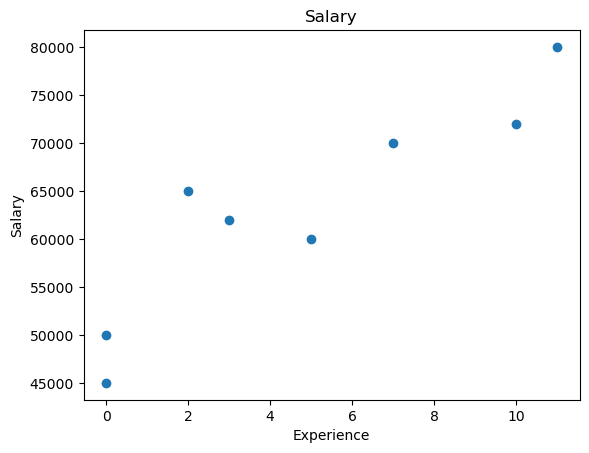

In [55]:
%matplotlib inline
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary')
plt.scatter(df['experience'],df['salary($)'])